In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = zp.size

In [3]:
# c интерсектом
b = (n * np.sum(zp*ks) - (np.sum(zp) * np.sum(ks))) / (n * np.sum(zp**2) - np.sum(zp)**2)
a = np.mean(ks) - b * np.mean(zp)

print (f'Кофициенты линейной регрессии a = {a} и b = {b}')

y_hat = a + b * zp
print (f'Расчет значения c интерсектом \n{y_hat}')

Кофициенты линейной регрессии a = 444.17735732435955 и b = 2.6205388824027653
Расчет значения c интерсектом 
[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


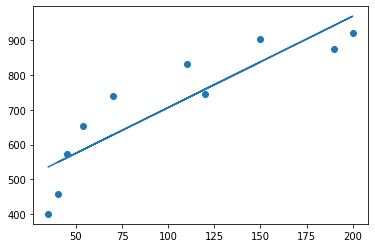

In [4]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

In [5]:
# без интерсекта
X = zp.reshape((n, 1))
Y = ks.reshape((n, 1))
# X = np.hstack([np.zeros((n, 1)), X])

B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@Y)
a = B[0][0]
b = B[-1][0]

print (f'Кофициент линейной регрессии b = {b}')

y_hat = B[0][0] * zp
print (f'Расчет значения без интерсектом \n{y_hat}')

Кофициент линейной регрессии b = 5.889820420132688
Расчет значения без интерсектом 
[ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


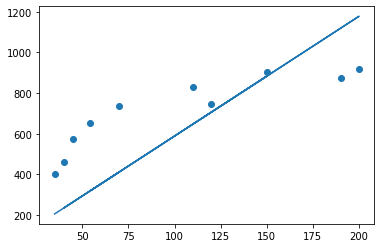

In [6]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

## Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [7]:
b = 0.1
alpha = 1e-5

for i in range(500):
    b -= alpha * (2/n) * np.sum((b * zp - ks) * zp)
    
print (f'Кофициент линейной регрессии b = {b}') 

y_hat = b * zp
print (f'Расчет значения без интерсектом \n{y_hat}')

Кофициент линейной регрессии b = 5.889820420132688
Расчет значения без интерсектом 
[ 206.1437147   265.04191891 1119.06587983 1177.96408403  235.59281681
  412.28742941  318.05030269  883.47306302  706.77845042  647.88024621]


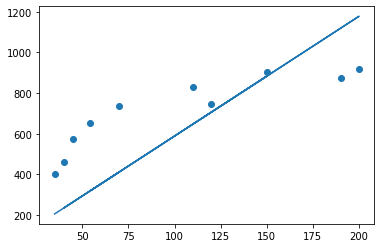

In [8]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

## Задача 3

*3. Произвести вычисления как в пункте 2, но с вычислением intercept.  
Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно, 
то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации.

Имеем формулу `(np.sum(b0 + b1 * X - y)**2) / n`
При взятии производной по b0 имеем `2 * np.sum(b0 + b1 * X - y)/n` ну а т.к. сумма деленая на колличество это средняя то делаем замену `2 * np.mean(b0 + b1 * X - y)`

При взятии производной по b0 имеем `2 * np.sum(((b0 + b1 * X) - y) * X) / n` ну а т.к. сумма деленая на колличество это средняя то делаем замену `2 * np.mean(((b0 + b1 * X) - y) * X)`

In [9]:
# a можно было взять любое, но мне кажется, что это должно подходить лучше всего)
a = np.min(ks)
b = 0.1
alpha = 1e-5

for i in range(10000):
    err = a + b * zp - ks
    a -= alpha * 2 * np.mean(err)
    b -= alpha * 2 * np.mean(err * zp)
    
print (f'Кофициенты линейной регрессии a = {a} и b = {b}')

y_hat = a + b * zp
print (f'Расчет значения c интерсектом \n{y_hat}')

Кофициенты линейной регрессии a = 403.1556277334497 и b = 2.922476948940347
Расчет значения c интерсектом 
[505.44232095 534.66709044 958.42624803 987.65101752 520.05470569
 607.72901416 560.96938298 841.52717007 753.85286161 724.62809212]


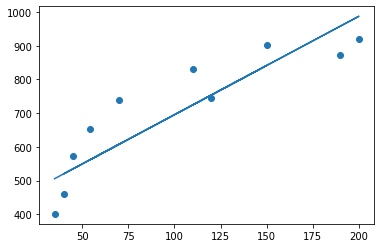

In [10]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()